# Are mutual funds better than broad-market index funds? Lets find out!

- Hypothesis Testing: An important skill related to creating accurate predictions using the massive amounts of data available today. We can make inferences and draw conclusions from a limited dataset. 

- Because gathering a complete data set would cost too much and thereby outweigh the benefits, we derive comfort from that fact and feel at ease using limited datasets to predict the future.


##### What are index funds and mutual funds?
- Think of them like stonks which aim to match the performance of a bucket of stonks. The fees they charge and the bucket of stonks chosen are the typical differentiating factors among index funds. This method of investment is contrasted to actively managed funds where the portfolio investments are hand-picked by the fund managers attempting to beat the market or 'obtain alpha'. So is it worth paying the fees for a mutual fund (typically in excess of index funds), but also in terms of the lost investment gains you could have had in the case that index funds do indeed outperform mutual funds? 



# Get the fund list

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mut_data = pd.read_csv("Top100MutualFunds.csv")
mut_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [66]:
mut_data['Morningstar Category'].value_counts() #These are just the categories of the mutual funds --> what their goals are

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [67]:
mut_data['Morningstar Rating'].value_counts(normalize=True)

3.0    0.432990
4.0    0.350515
5.0    0.195876
2.0    0.020619
Name: Morningstar Rating, dtype: float64

# Get the timeseries data using fund list

In [92]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime as dt

mut_dict = {}
symbols = list(mut_data["Symbol"])

start = dt(1980,1,1)
end = dt(2020,1,1)

In [93]:
yf.pdr_override()
fund_dat = web.get_data_yahoo(symbols,start,end)

[*********************100%***********************]  100 of 100 completed


In [94]:
# Specify that we only want Adj Close data, inclusvie of after-hours trading
close_dat = fund_dat["Adj Close"]
close_dat

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,0.599536,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,0.588704,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,0.595769,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,0.580032,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,0.586269,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097607,43.498634,33.953690,41.269047,41.468189,28.316504,28.111416,38.230675,38.514610,51.184906,...,42.597168,80.298599,43.188065,32.569065,106.341026,29.883806,43.968910,14.698990,29.131348,36.265900
2019-12-26,38.185295,43.719612,34.099628,41.387012,41.586231,28.408520,28.203419,38.318684,38.603237,51.416245,...,42.654209,80.374329,43.536549,32.785183,107.248009,30.146879,44.383228,14.812883,29.243481,36.535656
2019-12-27,38.211609,43.711113,34.099628,41.441452,41.640713,28.400158,28.186693,38.345089,38.629818,51.465824,...,42.504475,80.290176,43.512787,32.761173,107.316467,30.130442,44.357861,14.819583,29.243481,36.501934


In [95]:
# Get an equity market proxy measure (index fund) by which we can compare and contrast the mutual funds.
close_dat['S&P 500'] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


<ipython-input-95-47d5035c89a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_dat['S&P 500'] = web.get_data_yahoo("^GSPC", start, end)["Adj Close"]


In [96]:
close_dat

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,0.644044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.723485,...,NaN,NaN,NaN,NaN,0.344126,NaN,NaN,NaN,1.501897,105.760002
1980-01-03,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719449,...,NaN,NaN,NaN,NaN,0.336211,NaN,NaN,NaN,1.501897,105.220001
1980-01-04,NaN,0.655277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730548,...,NaN,NaN,NaN,NaN,0.299273,NaN,NaN,NaN,1.501897,106.519997
1980-01-07,NaN,0.672127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733576,...,NaN,NaN,NaN,NaN,0.304550,NaN,NaN,NaN,1.501897,106.809998
1980-01-08,NaN,0.679616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751738,...,NaN,NaN,NaN,NaN,0.311711,NaN,NaN,NaN,1.501897,108.949997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,38.097607,43.498634,33.953690,41.269047,41.468189,28.316504,28.111416,38.230675,38.514610,51.184906,...,80.298599,43.188065,32.569065,106.341026,29.883806,43.968910,14.698990,29.131348,36.265900,3223.379883
2019-12-26,38.185295,43.719612,34.099628,41.387012,41.586231,28.408520,28.203419,38.318684,38.603237,51.416245,...,80.374329,43.536549,32.785183,107.248009,30.146879,44.383228,14.812883,29.243481,36.535656,3239.909912
2019-12-27,38.211609,43.711113,34.099628,41.441452,41.640713,28.400158,28.186693,38.345089,38.629818,51.465824,...,80.290176,43.512787,32.761173,107.316467,30.130442,44.357861,14.819583,29.243481,36.501934,3240.020020


Text(0.5, 1.0, 'Index Returns Relative to Market Return')

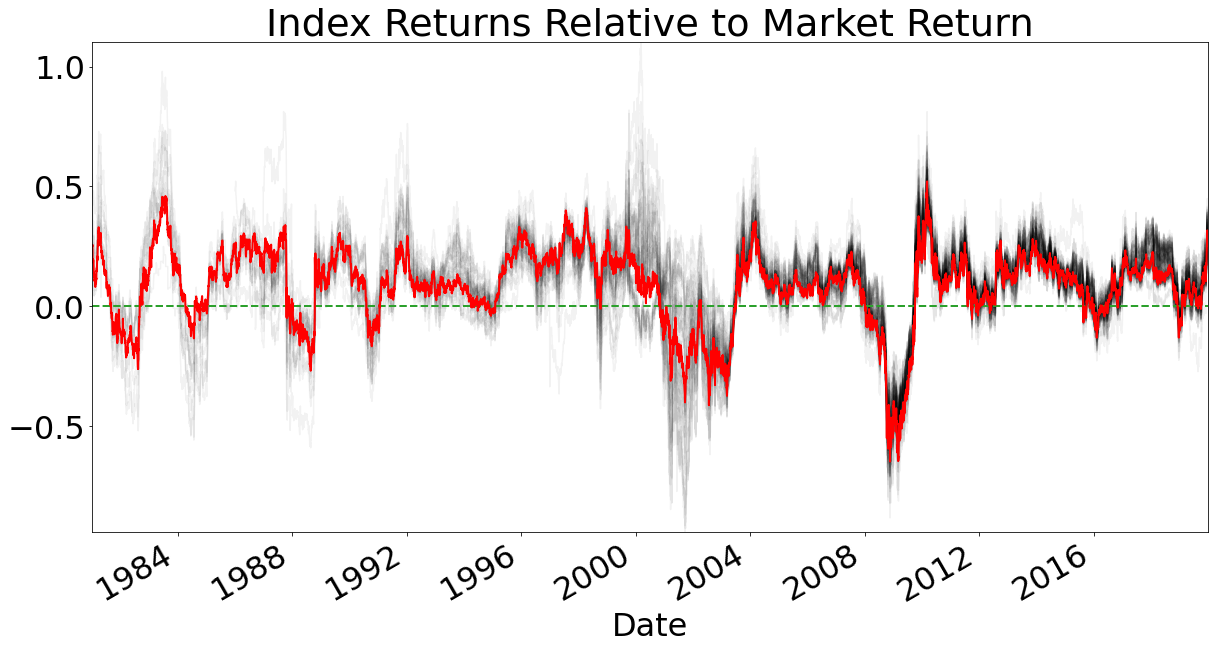

In [115]:
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  


# year over year rates of change are easier to interpret
days_per_year = 251
yoy_return = np.log(close_dat).diff(days_per_year)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
# ax.axvline("2003", ls = "--", color = "k",linewidth = 5) Some environmental issue her

yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

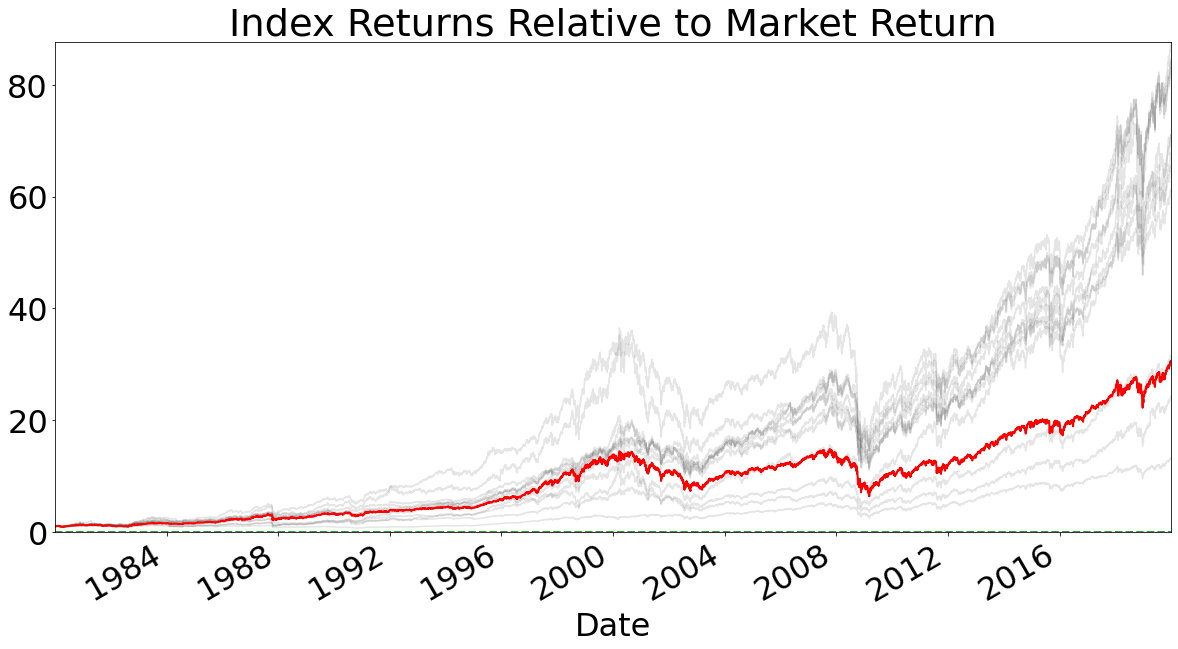

In [114]:
norm_data = close_dat.div(close_dat.iloc[0])
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .1, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
# ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

norm_data["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

In [117]:
monthly_close_data = close_dat.resample("M").first()
monthly_close_data.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,35.126396,39.759945,30.990505,39.542534,39.713707,25.792036,25.624294,35.268570,35.560009,46.166386,...,76.018013,40.260963,30.476660,99.783806,27.435659,39.930313,13.367850,26.328793,33.576424,2953.560059
2019-09-30,35.185394,38.784580,30.445385,40.388554,40.560371,25.256035,25.087618,35.319355,35.611183,45.121574,...,74.580856,39.150578,30.370667,97.703735,26.914337,38.901058,13.186357,25.675346,32.912346,2906.270020
2019-10-31,35.645611,38.633915,30.624969,39.771664,39.951832,25.128031,24.959455,35.779804,36.065319,45.679520,...,73.918167,39.294098,29.346064,96.186295,26.883211,39.103668,13.086224,26.262716,32.483124,2940.250000
2019-11-30,36.493111,40.663937,31.833954,40.644119,40.824951,26.328032,26.144951,36.630482,36.913807,48.072178,...,76.337387,40.850147,30.045624,100.013977,28.065918,41.202702,13.774643,27.672400,33.916565,3066.909912
2019-12-31,36.976173,41.718605,32.544640,40.555992,40.745579,27.064037,26.873865,37.106861,37.385201,49.166859,...,77.942230,41.703709,31.162083,102.793091,28.867357,42.458881,14.081303,28.127609,34.872185,3113.870117


In [103]:
monthly_returns = yoy_ret.resample("M").first()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,0.061447,0.023906,0.014965,0.195356,0.196477,0.028493,0.026412,0.060263,0.058628,0.025417,...,0.118376,0.096343,0.130696,0.084776,0.099323,0.071250,0.051442,0.029804,0.179025,0.048632
2019-09-30,0.043500,-0.025743,-0.010732,0.190979,0.191824,-0.018603,-0.020745,0.042316,0.040681,-0.010018,...,0.061118,0.030429,0.065415,0.026680,0.032907,-0.009377,0.000315,-0.016279,0.114670,0.001636
2019-10-31,0.043104,-0.038476,-0.021919,0.177165,0.178281,-0.041274,-0.043298,0.042041,0.040175,-0.008556,...,0.054952,0.036202,0.019097,0.004740,0.020282,-0.007612,-0.017207,-0.005473,0.099006,0.005340
2019-11-30,0.110029,0.099091,0.079586,0.254600,0.255207,0.089835,0.087596,0.108966,0.107080,0.103866,...,0.143027,0.143083,0.140589,0.128088,0.148206,0.122565,0.140137,0.105736,0.225230,0.112578
2019-12-31,0.096141,0.123163,0.096134,0.217971,0.218907,0.107662,0.105889,0.095085,0.092973,0.123951,...,0.154783,0.153317,0.197963,0.139524,0.185430,0.165635,0.171245,0.119405,0.241323,0.120574


# Calculate actual returns

In [121]:
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012487,-0.008626,0.016176,0.016344,-0.015695,-0.016124,-0.005742,-0.005979,-0.009414,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003612,-0.003640
2019-09-30,0.001678,-0.024837,-0.017746,0.021170,0.021095,-0.021001,-0.021166,0.001439,0.001438,-0.022891,...,-0.019086,-0.027967,-0.003484,-0.021066,-0.019184,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012952,0.012672,0.012290,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013150,0.025606,0.022079,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028155,0.030032,0.022018,0.016316,0.027786,0.015196


In [142]:
def t_valu(data,mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n - 1
    t = (x_bar - mu) / (s / np.sqrt(n))
    
    return t, df

In [126]:
sp500 = monthly_returns["S&P 500"].dropna()
sp500.mean() * 12 # Average return for s&p

0.08473776816463623

In [127]:
hypo_rate = .07 / 12
t_val(data=sp500, mu = hypo_rate), stats.ttest_1samp(sp500,hypo_rate)

((0.6072595645765047, 478),
 Ttest_1sampResult(statistic=0.6066253507590067, pvalue=0.5443875720700815))

In [128]:
# independent samples t-test, setting equal_var=True will turn this test into a paired samples t-test where equal variance
# is assumed
def t_value_ind_samp(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [130]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.007124728909622456)

In [131]:
t_value_ind_samp(sp500, prgfx)

(-0.021224972332542478, 950.108553283579)

# T Distribution

In [133]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

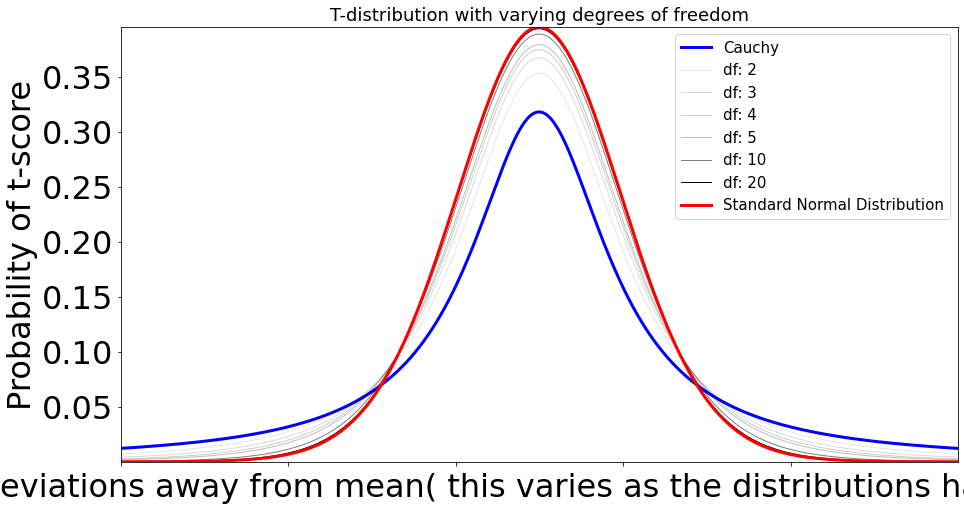

In [134]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

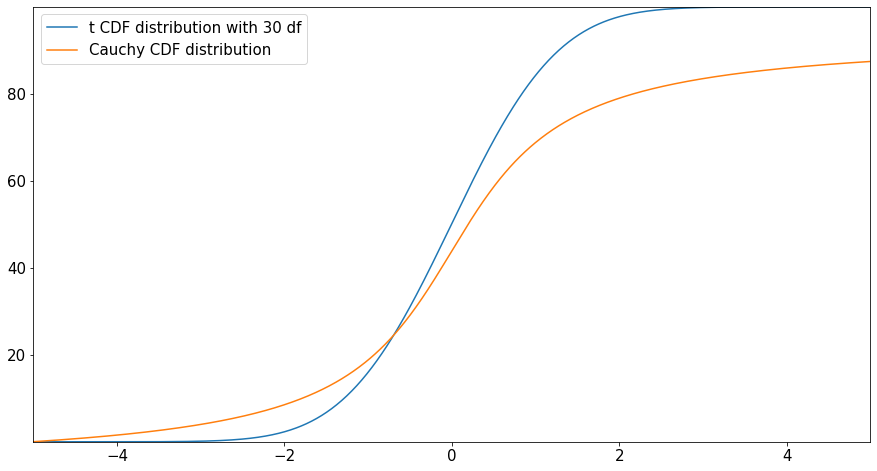

In [135]:
fig, ax = plt.subplots(figsize=(15,8))
t_dist = t_distribution(150000, x)
cauchy = t_distribution(1,x)

f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(t_dist)): 
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]

ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

In [143]:
# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_valu(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

In [144]:
t_test(sp500, hypo_rate, 'one_sample')

0.6072595645765047 478


'T-value: 0.6072595645765047, P-value: 0.5439676244389173, Fail to reject null hypothesis.'

In [145]:
from stats import * 
def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace = True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, sample = use_sample_ks)
    s = skewness(series, sample = use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = scipy.stats.t.sf(t, df=df)
    return t, p


In [146]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264,0.000188
2012-01-05,0.010167,0.011041,-0.004201,-0.021522,0.002939
2012-01-06,0.015415,0.010400,-0.002408,-0.007773,-0.002540
2012-01-09,-0.013250,-0.001587,0.004211,0.012556,0.002259
...,...,...,...,...,...
2023-04-04,-0.000174,-0.003255,0.004804,-0.011308,-0.005814
2023-04-05,-0.009938,-0.011355,0.006833,-0.037349,-0.002495
2023-04-06,0.025212,0.005481,0.006327,-0.002483,0.003573


In [147]:
for key, val in price_change_data.items():
    print(key)
    print("My JB Function:   ", jarque_bera_test(val))
    print("scipy JB Function:", jarque_bera(val)[:2])

MSFT
Date
2012-01-04    0.023261
2012-01-05    0.010167
2012-01-06    0.015415
2012-01-09   -0.013250
2012-01-10    0.003598
                ...   
2023-04-04   -0.000174
2023-04-05   -0.009938
2023-04-06    0.025212
2023-04-10   -0.007608
2023-04-11   -0.022929
Name: MSFT, Length: 2835, dtype: float64
11.698943054677573 -0.2190616027054991 8961.383286250304
My JB Function:    (8961.383286250304, 0.0)
scipy JB Function: (8961.383286250348, 0.0)
AAPL
Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
                ...   
2023-04-04   -0.003255
2023-04-05   -0.011355
2023-04-06    0.005481
2023-04-10   -0.016101
2023-04-11   -0.007620
Name: AAPL, Length: 2835, dtype: float64
8.719626620590597 -0.27722763691411667 3900.670514564264
My JB Function:    (3900.670514564264, 0.0)
scipy JB Function: (3900.6705145642836, 0.0)
PG
Date
2012-01-04   -0.000449
2012-01-05   -0.004201
2012-01-06   -0.002408
2012-01-09    0.004211
2

### Chop off the sides alpha / 2 Confidence Intervals 

In [149]:
def t_quintile(df, alpha):
    q = (1.0+alpha)/2
    a = stats.t.ppf(q, df)
    return a

def confidence_interval(data, alpha):
    n = len(data)
    df = n - 1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [154]:
sp500_CI = confidence_interval(sp500,0.05) #Take 5% confidence interval off the tails

In [155]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

We can say with 95% confidence that the true SP500 monthly return, not due to randomness, was somewhere between these two values. 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


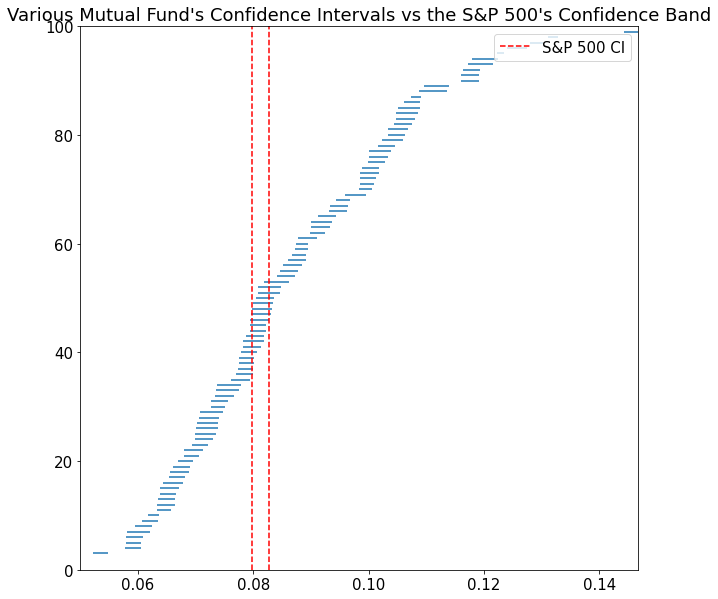

In [160]:
yearly_close_data = pd.DataFrame(close_dat).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes
yearly_return_CIs = confidence_interval(yearly_changes, 0.05)
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

# So quite a lot of firms do outperform the SP500

# ANOVA Test, can compare N groups v. T Test

In [168]:
mutual_fund_data = mut_data[["Symbol", "Morningstar Category"]]
mutual_fund_data

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [167]:
mutual_fund_data["Morningstar Category"].value_counts()

Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: Morningstar Category, dtype: int64

In [169]:
# identify fund categories containing > 2 funds in our data
fund_types = mutual_fund_data["Morningstar Category"].value_counts() > 2
fund_types

Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: Morningstar Category, dtype: bool

In [170]:
# pull fund types for which fund_types has value of true 
relevant_fund_types = fund_types[fund_types]
relevant_fund_types

Large Growth      True
Large Value       True
Large Blend       True
Mid-Cap Growth    True
Name: Morningstar Category, dtype: bool

In [171]:
# pull relevant funds, should kick out only 6 from the dataset
relevant_funds = mutual_fund_data[mutual_fund_data["Morningstar Category"].isin(relevant_fund_types.index)]
relevant_funds

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [172]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]

In [173]:
for key in relevant_fund_type_names: 
    print(relevant_fund_type_names[key].head())

0     AGTHX
1     FCNTX
9     AMCFX
10    CAFAX
11    CAFCX
Name: Symbol, dtype: object
16    AFMFX
17    AMRFX
18    CMLAX
19    CMLCX
20    CMLEX
Name: Symbol, dtype: object
2    CWMAX
3    CWMCX
4    CWMEX
5    CWMFX
6    AIVSX
Name: Symbol, dtype: object
31    PRNHX
35    RPMGX
62    PCBIX
87    ERASX
88    ERSMX
Name: Symbol, dtype: object


In [174]:
#create dictionary to store all returns for each category
fund_type_returns = {}

#iterate through fund_type_names dictionary we just created to access the names of each fund in each category
for key in relevant_fund_type_names.keys():
    # store key as fund type and value as a list containing all monthly returns for the fund type
    fund_type_returns[key] = []
    for val in relevant_fund_type_names[key]:
        #use .extend() method to add monthly returns to the current list, disregarding the fund's symbol 
        fund_type_returns[key].extend(monthly_returns[val].dropna())

In [175]:
[print(f"{key}: {np.mean(fund_type_returns[key])}") for key in fund_type_returns]

Large Growth: 0.00834602702108287
Large Value: 0.007025138869464984
Large Blend: 0.007410825130134077
Mid-Cap Growth: 0.009292540418125089


[None, None, None, None]

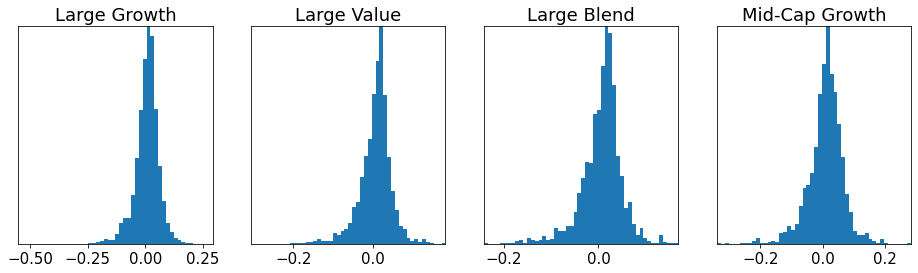

In [176]:
fig, axs = plt.subplots(1, 4 , figsize = (16, 4))
for num, key in enumerate(fund_type_returns): 
    axs[num].hist(fund_type_returns[key], bins = 50)
    axs[num].set_title(key)
    axs[num].set_yticks([])

In [177]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k - 1
    dfwn = N - k

    return k, N, dfbn, dfwn

In [178]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])

(4, 23079, 3, 23075)

In [179]:
def SSB(*args):
    ssb = 0
    alldata = np.concatenate(args)

    grand_mean = np.mean(alldata)

    for arg in args:
        group_mean = np.mean(arg)

        n = len(arg)
        val = n * (group_mean - grand_mean)**2

        ssb += val

    return ssb

In [180]:
SSB(fund_type_returns["Large Growth"], fund_type_returns['Large Value'],
    fund_type_returns['Large Blend'], fund_type_returns['Mid-Cap Growth'])

0.00986875453111578

In [181]:
def SSW(*args):
    ssw = 0
    for arg in args: 
        group_mean = np.mean(arg)
        val = 0 
        for i in arg:
            val += np.sum(i - group_mean)**2
        ssw += val
    return ssw

In [182]:
SSW(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

53.80316276176224

In [183]:
def get_sum_square_stats(*args): 
    ssw = SSW(*args)
    ssb = SSB(*args)
    sst = ssb + ssw
    return ssw, ssb, sst

In [184]:
get_sum_square_stats(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

(53.80316276176224, 0.00986875453111578, 53.81303151629335)

In [185]:
from scipy.stats import f as f_dist
def finish_anova(f, dfwn, dfbn): 
    # use scipy to plug f-value into f distribution to return p-value
     p_value =  1 - f_dist.cdf(f, dfwn, dfbn)
    
     if p_value > .05:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
     else:
        return_string = "F-value: " + str(f) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."

     return return_string

In [186]:
# use *args command to accept variable number of arguments
def anova(*args):

    k, N, dfbn, dfwn  = get_anova_counts(*args)
    
    ssw, ssb, sst = get_sum_square_stats(*args)

    msb = ssb / dfbn
    msw = ssw / dfwn
    f = msb / msw

    return finish_anova(f, dfbn, dfwn)

In [187]:
anova(fund_type_returns["Large Growth"],
      fund_type_returns['Large Value'],
      fund_type_returns['Large Blend'],
      fund_type_returns['Mid-Cap Growth'])

'F-value: 1.4108310064338059, P-value: 0.23745809917841199, Fail to reject null hypothesis.'

In [188]:
stats.f_oneway(fund_type_returns["Large Growth"],
               fund_type_returns['Large Value'],
               fund_type_returns['Large Blend'],
               fund_type_returns['Mid-Cap Growth'])

F_onewayResult(statistic=1.4108310064338048, pvalue=0.23745809917761887)

In [190]:
# Multiple Comparisons Procedure

In [191]:
fund_types_list = ["Large Growth", "Large Value", "Large Blend", "Mid-Cap Growth"]
for ftype in fund_types_list: 
    print(ftype+" mean: "+(str)(np.mean(fund_type_returns[ftype])))

Large Growth mean: 0.00834602702108287
Large Value mean: 0.007025138869464984
Large Blend mean: 0.007410825130134077
Mid-Cap Growth mean: 0.009292540418125089


In [192]:
for ftype1 in fund_types_list: 
    for ftype2 in fund_types_list: 
        result = t_test(fund_type_returns[ftype1], fund_type_returns[ftype2], "independent")
        scipy_result = stats.ttest_ind(fund_type_returns[ftype1], fund_type_returns[ftype2])
        if("Reject" in result):
            print("\nftype1: " + ftype1 + "\nftype2: " + ftype2 + "\n" + result, scipy_result) 